In [117]:
using Optics_in_the_length_gauge
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful
using Statistics
using Optics_in_the_length_gauge
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful
using Statistics
using StaticArrays
using Parameters
using CairoMakie
using LaTeXStrings
using LMC
using JLD2
# add https://github.com/fernandopenaranda/Optics_in_the_length_gauge
# units meV, fs, K
const kB = (PhysicalConstants.CODATA2018.k_B |> u"eV/K").val
const μB = (PhysicalConstants.CODATA2018.BohrMagneton |> u"eV/T").val
const ħ = PhysicalConstants.CODATA2018.ħ
const e = PhysicalConstants.CODATA2018.e
const C = ((e^3 / ħ^2) |> u"μA/V^2/s").val
const C_cd = ((e^2/ħ) |> u"μA/V").val
const ħ_ev_s = (ħ |> u"eV*s").val
const ang_to_m = 1e-10
const Kb_in_mev = 1e3* kB


proj_folder = dirname(pwd())
rhomb_folder = proj_folder * "/model/rhombohedral/"
common_folder = proj_folder * "/comfunctions/"
figures_folder = proj_folder * "/Paper/Figures/"

"/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figures/"

### Presets

In [109]:
#presets
μlist = collect(0:0.25:15)
p = Params_rhombohedral(1, 0, 3160, 390,-20, 315, 0*44, 2, 0)
B = 10
evals =50000 #1000000#200000 #evals 80000 not perfect
T = 0.1 # T = 0.1, evals = 500000 quite good for drude conductivities
τ = 200 # not appearing
Nlist = [3,4,5,6,7]

xx_drude_presets(N, μ,ξ, evals) = 
    xx_drude_presets(N, μ, ξ, p; evals = evals, T = T, τ = τ)
lmcnoshift_presets(N, μ, ξ, evals) = xxx_lmc_presets(N, μ, ξ, p; evals = evals,
    T = T, τ = τ, berry_contribution = true, omm_contribution = true, 
    fermi_surface = false, with_shift = false)

lmcnoshift_presets (generic function with 1 method)

### Compute

In [103]:
# Compute
lmcpv = [[LMC.linear_magneto_conductivity_orbital(lmcnoshift_presets(N, μ, 1, evals))
    for μ in μlist] for N in Nlist];
# lmcnv = [[linear_magneto_conductivity_orbital(lmcnoshift_presets(N, μ, -1, evals))
#     for μ in μlist] for N in [3,5,7]];
drude = [[LMC.drude_conductivity(LMC.xx_drude_presets(N, μ, 1, p; evals = evals, T = T)) for μ in μlist] for N in Nlist];


In [110]:
#qah
qah = [[σij_anomalous_hall(σxyahe_presets(N, μ, 1, p, evals = evals, T = T)) for μ in μlist] for N in Nlist];

In [ ]:
# fig = Figure(size = (600,300))
# kpoints = 200

# ax = Axis(fig[1, 1]; ylabel = "E [meV]", title = "N = 3")
# LMC.abcNplotbandsk(ax, Nlist[1], kpoints, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)
#  ax2 = Axis(fig[1,2]);
# [lines!(ax2, μlist, drude[i]) for i in 1:length(Nlist)]
# # xlims!(ax2,0, 15)
# # ylims!(ax2, -3,0)
# ax3 =  Axis(fig[1,3]);
# [lines!(ax2, μlist, drude[i]) for i in 1:length(Nlist)]
# lines!(ax3, μlist, lmcpv[1]);
# ax4 = Axis(fig[1,4]);
# [lines!(ax4, μlist, 100 .* abs.(10 .* lmcpv[i]) ./ abs.(drude[i])) for i in 1:length(Nlist)]

# fig

In [ ]:
# fig = Figure(size = (600,600))
# kpoints = 200
# ax = Axis(fig[1, 1]; ylabel = "E [meV]", title = "N = 3")
# LMC.abcNplotbandsk(ax, Nlist[1], kpoints, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)
#  ax2 = Axis(fig[1,2]);
# lines!(ax2, μlist, drudemine[1])
# scatter!(ax2, μlist, drude[1])
# fig
# # scatter!(ax, μlist, lmcpv[1]);
# fig

### Save

In [104]:
@save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/drudeit$(evals)T$(T)Ez$(p.Delta_Ez).jld" μlist drude T Nlist
@save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/lmcpvit$(evals)T$(T)Ez$(p.Delta_Ez).jld" μlist lmcpv T Nlist
@save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/qahit$(evals)T$(T)Ez$(p.Delta_Ez).jld" μlist qah T Nlist
# @save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/lmcpvit$(evals)T$(T).jld" μlist lmcnv T Nlist

# save 
# @save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/drudeN3it$(evals)T$(T).jld" μlist drude[1] T 
# @save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/drudeN5it$(evals)T$(T).jld" μlist drude[2] T 
# @save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/drudeN7it$(evals)T$(T).jld" μlist drude[3] T

# @save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/lmcpN3it$(evals)T$(T).jld" μlist lmcpv[1] T
# @save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/lmcpN5it$(evals)T$(T).jld" μlist lmcpv[2] T
# @save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/lmcpN7it$(evals)T$(T).jld" μlist lmcpv[3] T

# @save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/lmcpN3it$(evals)T$(T).jld" μlist lmcnv[1] T
# @save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/lmcpN5it$(evals)T$(T).jld" μlist lmcnv[2] T
# @save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/lmcpN7it$(evals)T$(T).jld" μlist lmcnv[3] T

### Load

In [33]:
setT = 3
setevals = 500000
@load "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/drudeit$(setevals)T$(setT)Ez$(p.Delta_Ez).jld" μlist drude T Nlist
@load "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/lmcpvit$(setevals)T$(setT)Ez$(p.Delta_Ez).jld" μlist lmcpv T Nlist
# @load "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/qahit$(evals)T$(T)Ez$(p.Delta_Ez).jld" μlist qah T Nlist;

4-element Vector{Symbol}:
 :μlist
 :lmcpv
 :T
 :Nlist

### Plotting functions

In [120]:
function lat_fig(strpaths)
    with_theme(merge(theme_latexfonts(), Theme(fontsize = fontsizetheme))) do #
        figure2(strpaths)     
    end
end


function figure2(p, μlist, drude, lmcpv, qah, Nlist; B = 10)
    #bands
    fig = Figure(size = (600,700))
    kpoints = 200

    ga = fig[1, 1:5] = GridLayout()
    ax = Axis(ga[1, 1]; ylabel = "E [meV]", title = "N = 3")
    ax2 = Axis(ga[1, 2];  ylabel = "E [meV]", title = "N = 5")
    ax3 = Axis(ga[1, 3];  ylabel = "E [meV]", title = "N = 7")
    
    LMC.abcNplotbandsk(ax, 3, kpoints, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)
    LMC.abcNplotbandsk(ax2, 5, kpoints, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)
    LMC.abcNplotbandsk(ax3, 7, kpoints, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)

    LMC.abcNplotbandsk(ax, 3, kpoints, Params_rhombohedral(p, ξ =-1); ylims = [-1, 1], color = :black)#, linestyle = :dash)
    LMC.abcNplotbandsk(ax2, 5, kpoints, Params_rhombohedral(p, ξ =-1); ylims = [-1, 1], color = :gray)#, linestyle = :dash)
    LMC.abcNplotbandsk(ax3, 7, kpoints, Params_rhombohedral(p, ξ =-1); ylims = [-1, 1], color = :gray)#, linestyle = :dash)
    ylims!(ax, -15,15)
    ylims!(ax2, -15,15)
    ylims!(ax3, -15,15)

    # hlines!(ax2, 1, linestyle = :solid, linewidth = 1, color = :purple)
    hideydecorations!(ax2, grid = false)
    hideydecorations!(ax3, grid = false)

    # hlines!(ax, 2.6, linestyle = :dash, linewidth = 1, color = :black )
    # for axis in [ax,ax2,ax3]
    #     hlines!(axis, μlist[1], linestyle = :solid, linewidth = 1, color = :lightblue)
    #     hlines!(axis, 5, linestyle = :solid, linewidth = 1, color = :lightblue )
    # end

    colorlist= [:lightblue, :blue, :purple, :red, :orange]
    #_______________________________________________________________________________________
    # ax5 = Axis(fig[2,1:3])
    # [lines!(ax5, μlist, drudelist[i], color = colorlist[i], label = "N = $([3,5,7][i])") for i in 1:3]
    # axislegend(ax5, position = :lb)
    # #_______________________________________________________________________________________
    ax4 = Axis(fig[3:4,4:5]; xlabel = "μ [meV]", ylabel = "σxxx/σxx [%]")
    for i in 1:length(Nlist)
        v = abs.(B .* lmcpv[i]) ./ abs.(drude[i].+ B .* lmcpv[i]) .* 100
        # inds = findall(x -> x > 1, v)
        # v[inds] .= 0 
        lines!(ax4, μlist, v , color = colorlist[i], label = "N = $(Nlist[i])")
        lines!(ax4, μlist, -v , color = colorlist[i],  linestyle = :dash)
    end
    ylims!(ax4, 0,40)
    #_______________________________________________________________________________________
    ax6 = Axis(fig[3,1:3]; xlabel = "μ [meV]", ylabel = "σxxx [e²/h × 1/T]")
    for i in 1:length(Nlist)
        v = lmcpv[i]
        inds = findall(x -> x > 1, v)
        v[inds] .= 0 
        lines!(ax6, μlist, -v, color = colorlist[i], label = "N = $(Nlist[i])")
        lines!(ax6, μlist, v , color = colorlist[i], linestyle = :dash)
    end
    # axislegend(ax6, position = :lb)
    hidexdecorations!(ax6, grid = false)

    ax7 = Axis(fig[4,1:3], xlabel = "μ [meV]", ylabel = "σxy [e²/h]")
    for i in 1:length(Nlist)
        v = qah[i] 
        
        lines!(ax7,μlist,  -v , color = colorlist[i], label = "N = $(Nlist[i])")
        lines!(ax7, μlist,  v , color = colorlist[i],  linestyle = :dash)
    end


#_______________________________________________________________________________________

markers = [MarkerElement(color = colorlist[i],   marker = :rect, markersize = 12) for i in 1:length(Nlist)]
 entries = vcat(markers,[LineElement(color = :black, linewidth = 2),
             LineElement(color = :black, linestyle = :dash, linewidth = 2)])

labels = [
    "N = $(Nlist[1])",
    "N = $(Nlist[2])",
    "N = $(Nlist[3])",
    "N = $(Nlist[4])",
    "N = $(Nlist[5])",
    "K",
    "K'"
]

Legend(
    fig[2, 1:5],            # below axis
    entries,
    labels,
    orientation = :horizontal,
    framevisible = true,
         # ← box on
    framesize = 0.5,
    framecolor = :black,
    padding = (4, 4, 2, 2),   # left, right, bottom, top
    patchsize = (18, 18),
    colgap = 6,
    rowgap = 2,
    tellwidth = false
)

rowgap!(fig.layout, 10)

xlims!(ax6, 0, μlist[end])
xlims!(ax7, 0,  μlist[end])
xlims!(ax4, 0,  μlist[end])

ax7.yticks = ([-3.5,-2.5,-1.5,0, 1.5, 2.5, 3.5], [ "-7/2",  "-5/2","-3/2","0","3/2", "5/2", "7/2"])

text!(ax, "a)", position = (-0, 12), fontsize = 14)
text!(ax2, "b)", position = (-0, 12), fontsize = 14)
text!(ax3, "c)", position = (-0, 12), fontsize = 14)

text!(ax4, "f)", position = (0.5, 38), fontsize = 14)
text!(ax6, "d)", position = (0.5, 0.15), fontsize = 14)
text!(ax7, "e)", position = (14, 3), fontsize = 14)

text!(ax4, "B = $(B)T", position = (7.5, 38.5),     align = (:center, :baseline), fontsize = 14
    ,    framevisible = true,
    # ← box on
framesize = 0.5,
framecolor = :black)

    
fig

end

figure2 (generic function with 1 method)

### Plot

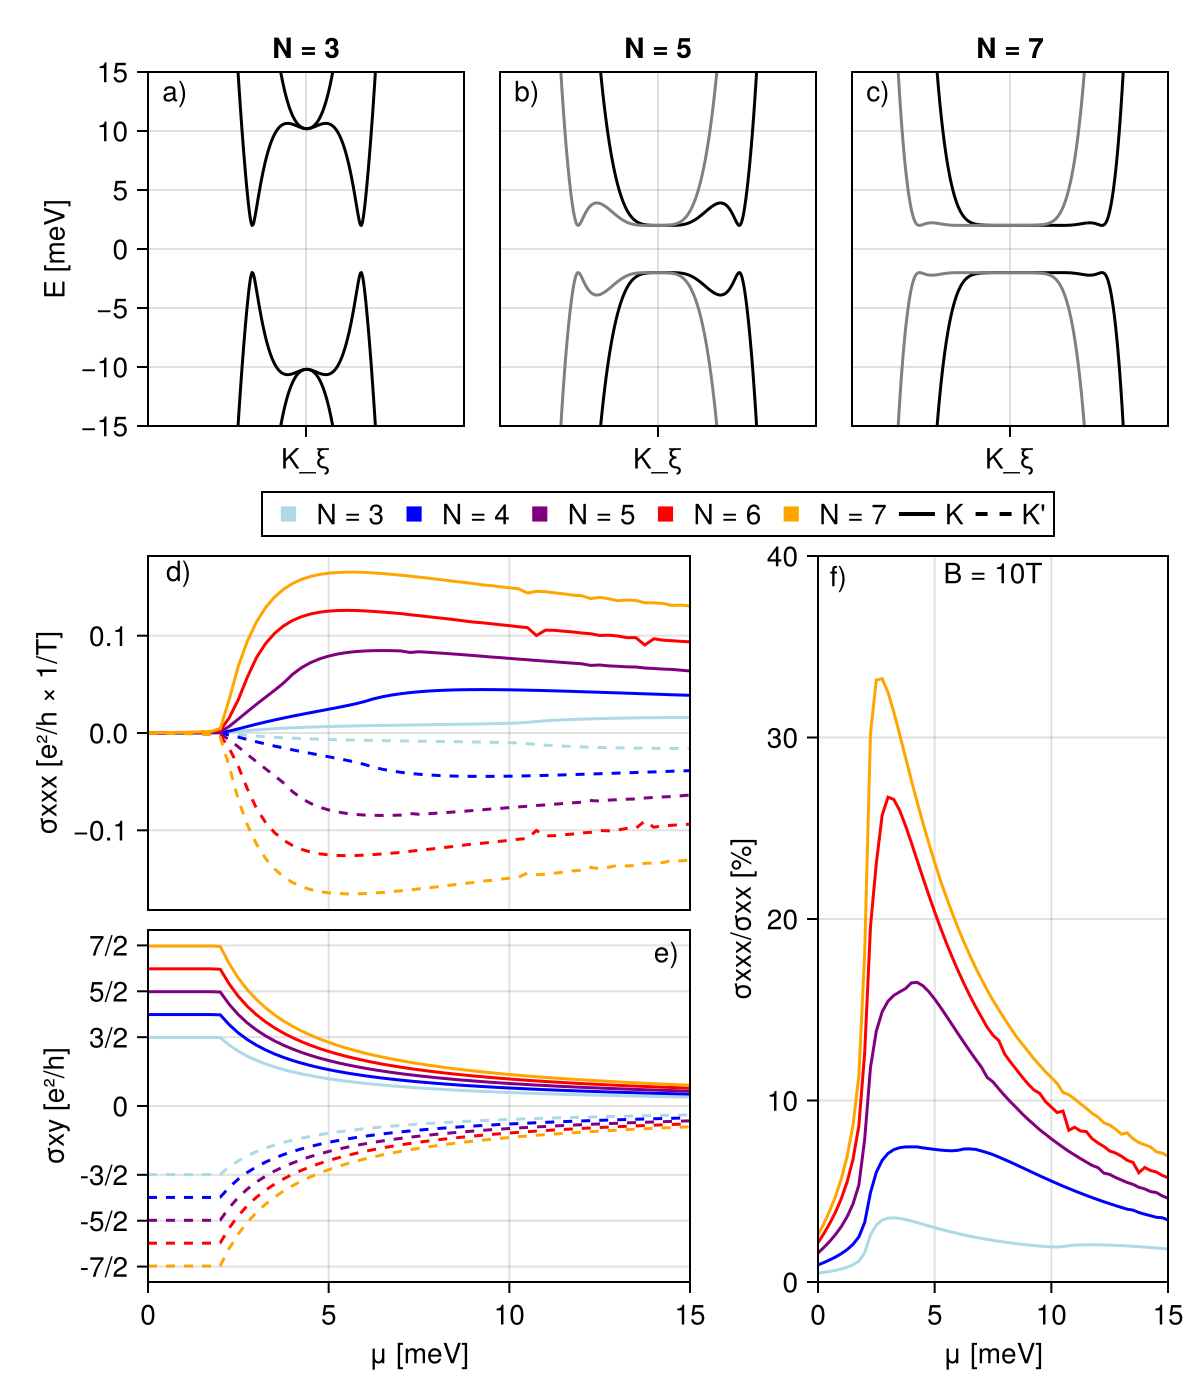

In [121]:
fig2 = figure2(p, μlist, drude, lmcpv, qah, Nlist)

In [122]:
save("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figures/Figure2v5.pdf", fig2)
@save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/Figure2v5.jld" p μlist drude lmcpv qah Nlist

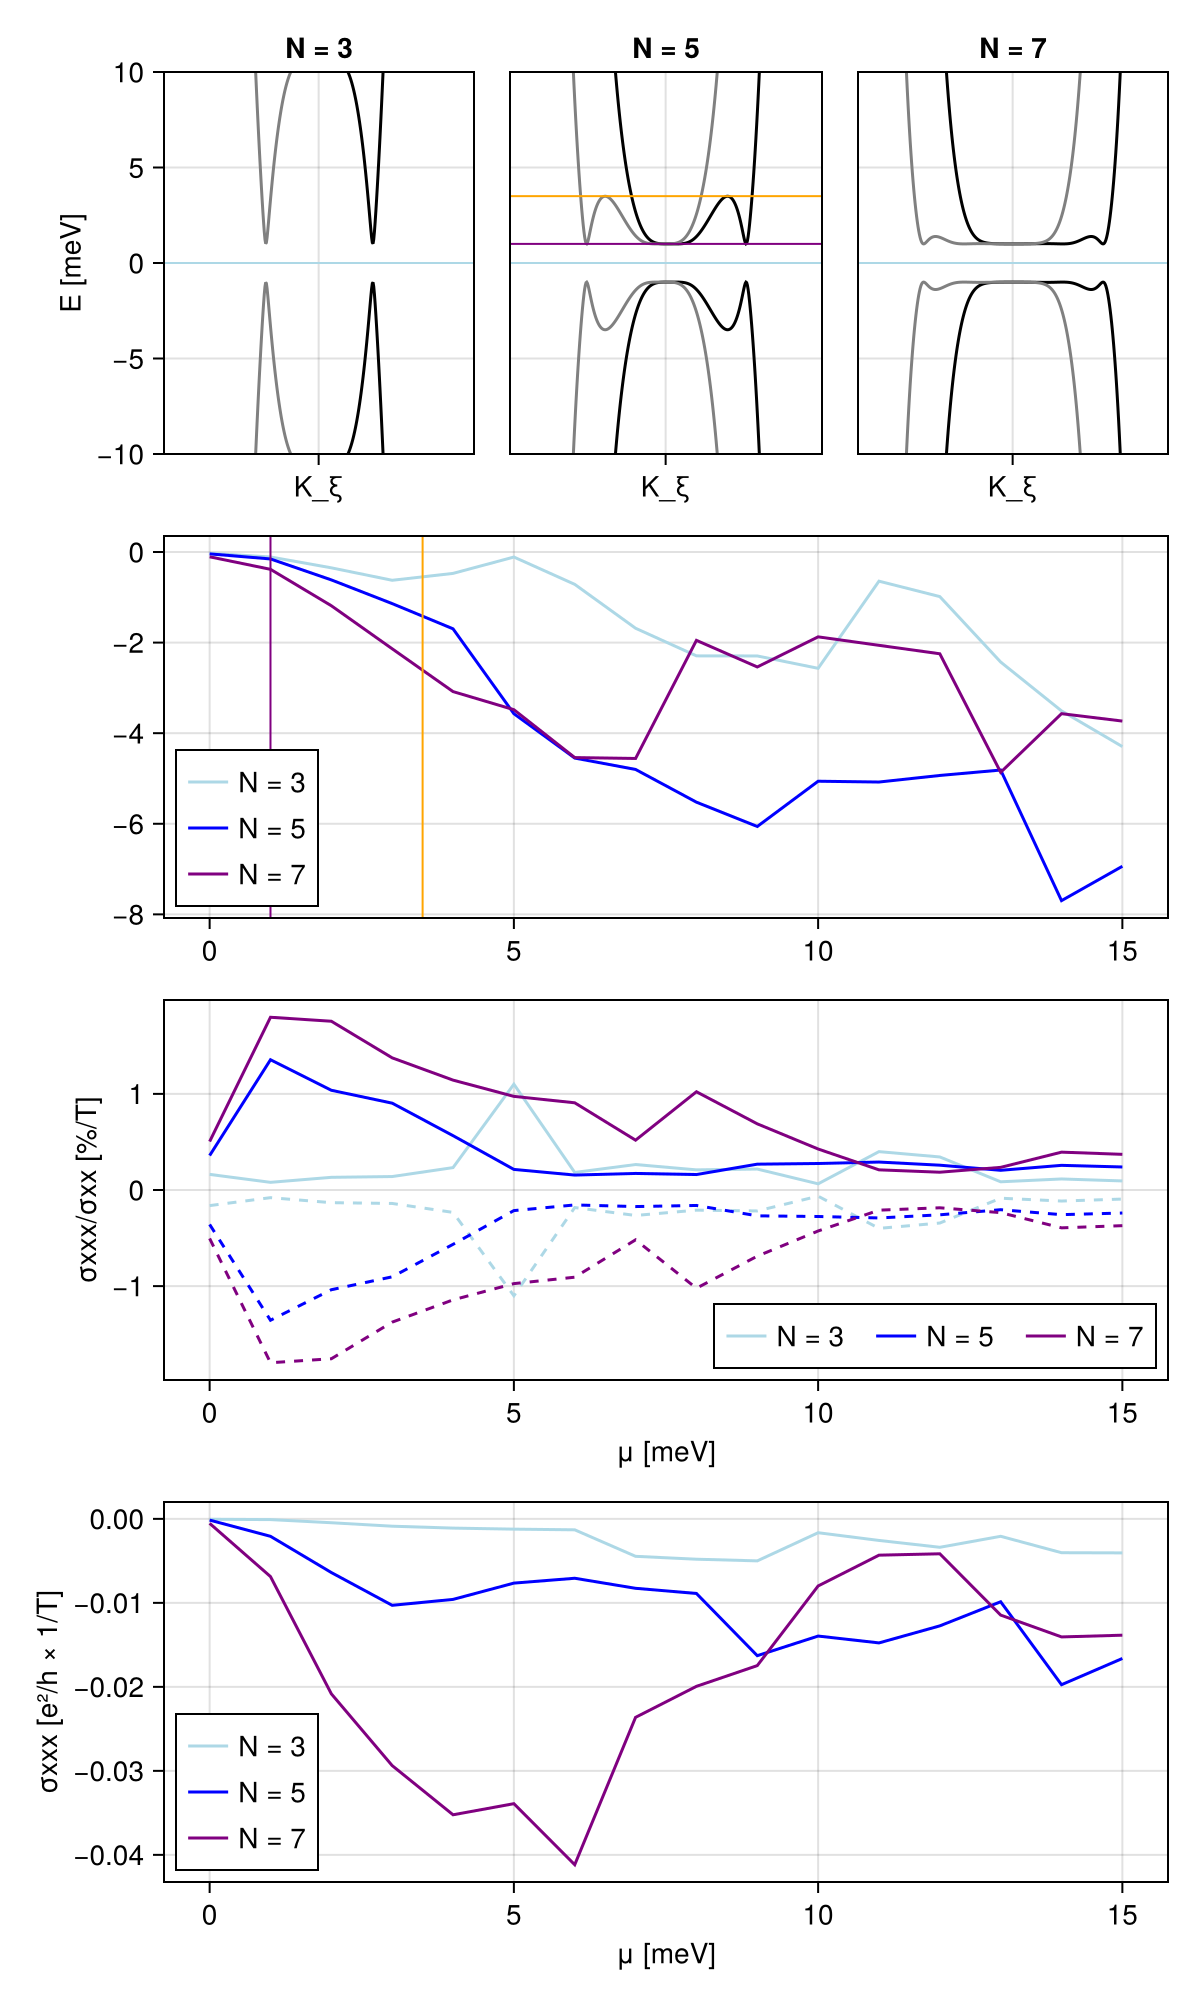

In [282]:

# single valley
# B = 10
# fig = Figure()
# ax = Axis(fig[1,2], xlabel = "μ", ylabel = "σxx [e²/h]", title = "+ valley: T = $(T), evals = $(evals/1e5)×1e5")
# lines!(ax, μlist, (lmcpv) .*B + (drudepv), label = "σxx + σxxx*B", color = :blue)
# lines!(ax, μlist, -(lmcpv) .*B + (drudepv), label = "σxx - σxxx*B", color = :red)
# lines!(ax, μlist,(drudepv), label = "σxx", color = :gray)
# axislegend(ax, position = :lb)
# ylims!(ax, [-4,2])

#bands
fig = Figure(size = (600,1000))
kpoints = 200
ax = Axis(fig[1, 1]; ylabel = "E [meV]", title = "N = 3")
ax2 = Axis(fig[1, 2];  ylabel = "E [meV]", title = "N = 5")
ax3 = Axis(fig[1, 3];  ylabel = "E [meV]", title = "N = 7")
LMC.abcNplotbandsk(ax, 3, kpoints, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)
LMC.abcNplotbandsk(ax2, 5, kpoints, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)
LMC.abcNplotbandsk(ax3, 7, kpoints, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)

LMC.abcNplotbandsk(ax, 3, kpoints, Params_rhombohedral(p, ξ =-1); ylims = [-1, 1], color = :gray)
LMC.abcNplotbandsk(ax2, 5, kpoints, Params_rhombohedral(p, ξ =-1); ylims = [-1, 1], color = :gray)
LMC.abcNplotbandsk(ax3, 7, kpoints, Params_rhombohedral(p, ξ =-1); ylims = [-1, 1], color = :gray)
ylims!(ax, -10,10)
ylims!(ax2, -10,10)
ylims!(ax3, -10,10)


hideydecorations!(ax2, grid = false)
hideydecorations!(ax3, grid = false)

# hlines!(ax, 2.6, linestyle = :dash, linewidth = 1, color = :black )
for axis in [ax,ax2,ax3]
    hlines!(axis, μlist[1], linestyle = :solid, linewidth = 1, color = :lightblue)
    hlines!(axis, μlist[end], linestyle = :solid, linewidth = 1, color = :lightblue )
end

colorlist= [:lightblue, :blue, :purple]

ax5 = Axis(fig[2,1:3])

lines!(ax5, μlist, drude[1], color = colorlist[1], label = "N = 3")
lines!(ax5, μlist, drude[2],color = colorlist[2], label = "N = 5")
lines!(ax5, μlist, drude[3], color = colorlist[3],label = "N = 7")
axislegend(ax5, position = :lb)
# hidexdecorations!(ax5, grid = false)


ax4 = Axis(fig[3,1:3]; xlabel = "μ [meV]", ylabel = "σxxx/σxx [%/T]")
for i in 1:3
    v = lmcpv[i] ./ drude[i] .* 100
    inds = findall(x -> x > 1, v)

    # v[inds] .= 0 
    lines!(ax4, μlist, v , color = colorlist[i], label = "N = $([3,5,7][i])")
    lines!(ax4, μlist, -v , color = colorlist[i],  linestyle = :dash)
end
axislegend(ax4, position = :rb, orientation = :horizontal)


ax6 = Axis(fig[4,1:3]; xlabel = "μ [meV]", ylabel = "σxxx [e²/h × 1/T]")
for i in 1:3
    v = lmcpv[i]
    inds = findall(x -> x >1, v)

    v[inds] .= 0 
    lines!(ax6, μlist, v , color = colorlist[i], label = "N = $([3,5,7][i])")
end
axislegend(ax6, position = :lb)

hlines!(ax2, 1, linestyle = :solid, linewidth = 1, color = :purple)
vlines!(ax5, 1, linestyle = :solid, linewidth = 1, color = :purple)

hlines!(ax2, 3.5, linestyle = :solid, linewidth = 1, color = :orange)
vlines!(ax5, 3.5, linestyle = :solid, linewidth = 1, color = :orange)

# ax7 = Axis(fig[5,1:3], xlabel = "μ [meV]", ylabel = "σxy [e²/h]") 
# lines!(ax7, qah5 , color = colorlist[2], label = "N = $([3,5,7][2])")


fig

In [64]:
μlist

81-element Vector{Float64}:
 0.0
 0.0625
 0.125
 0.1875
 0.25
 0.3125
 0.375
 0.4375
 0.5
 0.5625
 ⋮
 4.5
 4.5625
 4.625
 4.6875
 4.75
 4.8125
 4.875
 4.9375
 5.0

In [29]:
lmc0p = lmcnoshift_presets(0,1,1e5) #1e6
lmc0n = lmcnoshift_presets(0,-1,1e5) #1e6
evals = 1e4
ω, j = c_dos(lmc0p, μlist, η = 0.1, evals = evals)
ω, j2 = c_dos(lmc0n, μlist, η = 0.1, evals = evals)

MethodError: MethodError: no method matching lmcnoshift_presets(::Int64, ::Int64, ::Float64)

Closest candidates are:
  lmcnoshift_presets(::Any, ::Any, ::Any, !Matched::Any)
   @ Main ~/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2.ipynb:12
